In [1]:
from tensorflow.keras.layers import Dense
import random
from keras.datasets import mnist
import matplotlib.pylab as plt
import numpy as np
import keras
import sklearn.utils

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(f'x_train shape : {x_train.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'x_test shape : {x_test.shape}')
print(f'y_test shape : {y_test.shape}')
num_train_samples = len(y_train)
num_test_samples = len(y_test)
print("Number of training samples:", num_train_samples)
print("Number of test samples:", num_test_samples)


x_train shape : (60000, 28, 28)
y_train shape : (60000,)
x_test shape : (10000, 28, 28)
y_test shape : (10000,)
Number of training samples: 60000
Number of test samples: 10000



 number : Two (2)


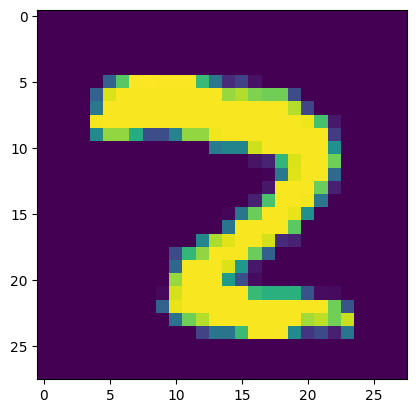

In [3]:
class_names = {
    0: 'Zero',
    1: 'One',
    2: 'Two',
    3: 'Three',
    4: 'Four',
    5: 'Five',
    6: 'Six',
    7: 'Seven',
    8: 'Eight',
    9: 'Nine'}
plt.imshow(x_train[28])
print(f'\n number : {class_names[y_train[28]]} ({y_train[28]})')

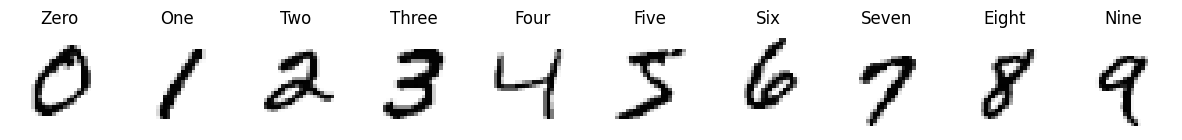

In [4]:
fig, axs = plt.subplots(1, len(class_names), figsize=(15, 3))
for class_label, ax in enumerate(axs):
    example_image, _ = next((image, label) for image, label in zip(x_train, y_train) if label == class_label)
    ax.imshow(example_image, cmap='Greys',  interpolation='nearest') 
    ax.set_title(class_names[class_label]) 
    ax.axis('off')
plt.show()



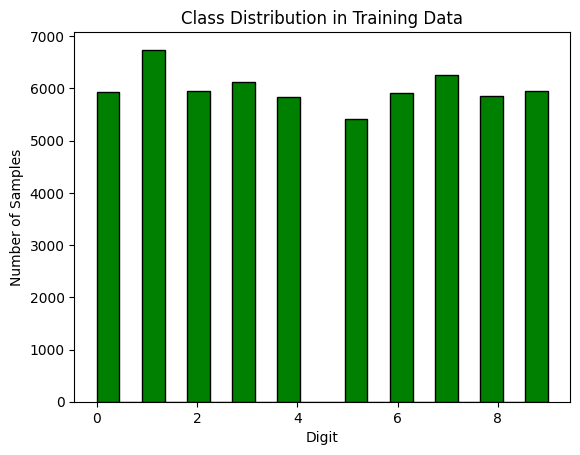

In [5]:
plt.hist(y_train, bins=20, color='green', edgecolor='black')
plt.xlabel('Digit')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Training Data')
plt.show()


In [6]:

x_train = sklearn.utils.shuffle(x_train,random_state=42)
y_train = sklearn.utils.shuffle(y_train,random_state=42)
(x_train,x_valid) = x_train[5000:],x_train[:5000]
(y_train,y_valid) = y_train[5000:],y_train[:5000]

x_test1 = x_test


x_train = x_train.reshape(x_train.shape[0],784)
x_valid = x_valid.reshape(x_valid.shape[0],784)
x_test = x_test.reshape(x_test.shape[0],784)

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [8]:
(x_train,x_valid) = x_train[5000:],x_train[:5000]
(y_train,y_valid) = y_train[5000:],y_train[:5000]

In [9]:
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)
y_valid = keras.utils.to_categorical(y_valid,10)

In [10]:
model = keras.Sequential()


In [11]:
model.add(keras.layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(32,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 472042 (1.80 MB)
Trainable params: 472042 (1.80 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
optimizer = keras.optimizers.Adam(learning_rate=6e-5)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [13]:
import datetime
start = datetime.datetime.now()
tranedmodel = model.fit(x_train,y_train,batch_size=50,epochs=25,validation_data=(x_valid,y_valid),verbose=2,shuffle=True)
end = datetime.datetime.now()

Epoch 1/25


1000/1000 - 4s - loss: 0.6776 - accuracy: 0.8157 - val_loss: 0.2914 - val_accuracy: 0.9194 - 4s/epoch - 4ms/step
Epoch 2/25
1000/1000 - 3s - loss: 0.2511 - accuracy: 0.9306 - val_loss: 0.2145 - val_accuracy: 0.9380 - 3s/epoch - 3ms/step
Epoch 3/25
1000/1000 - 3s - loss: 0.1936 - accuracy: 0.9453 - val_loss: 0.1806 - val_accuracy: 0.9484 - 3s/epoch - 3ms/step
Epoch 4/25
1000/1000 - 3s - loss: 0.1596 - accuracy: 0.9554 - val_loss: 0.1565 - val_accuracy: 0.9540 - 3s/epoch - 3ms/step
Epoch 5/25
1000/1000 - 3s - loss: 0.1356 - accuracy: 0.9617 - val_loss: 0.1364 - val_accuracy: 0.9584 - 3s/epoch - 3ms/step
Epoch 6/25
1000/1000 - 3s - loss: 0.1172 - accuracy: 0.9675 - val_loss: 0.1237 - val_accuracy: 0.9638 - 3s/epoch - 3ms/step
Epoch 7/25
1000/1000 - 3s - loss: 0.1011 - accuracy: 0.9723 - val_loss: 0.1143 - val_accuracy: 0.9660 - 3s/epoch - 3ms/step
Epoch 8/25
1000/1000 - 3s - loss: 0.0898 - accuracy: 0.9754 - val_loss: 0.1078 - val_accuracy: 0.9672 - 3s/epoch - 3ms/step
Epoch 

In [14]:
print(f'training time : {end - start}')

training time : 0:01:20.474111


In [15]:
y_hat = model.predict(x_test)


313/313 [==============================] - 0s 1ms/step


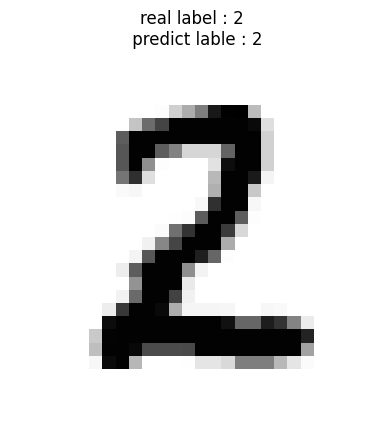

In [16]:
n = random.randint(0,y_test.shape[0])
plt.imshow(x_test1[n],cmap='Greys')
plt.title(f'real label : {np.argmax(y_test[n])} \n predict lable : {np.argmax(y_hat[n])}')
plt.axis('off')
plt.show()

In [17]:

model.save('model2.h5')

c:\Users\ali0a\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


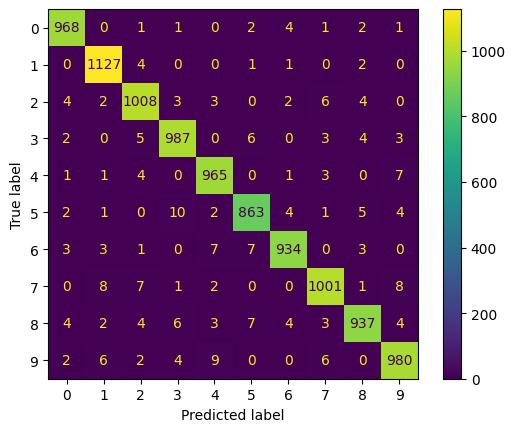

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true = np.argmax(y_test,axis=-1),y_pred = np.argmax(y_hat,axis=-1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

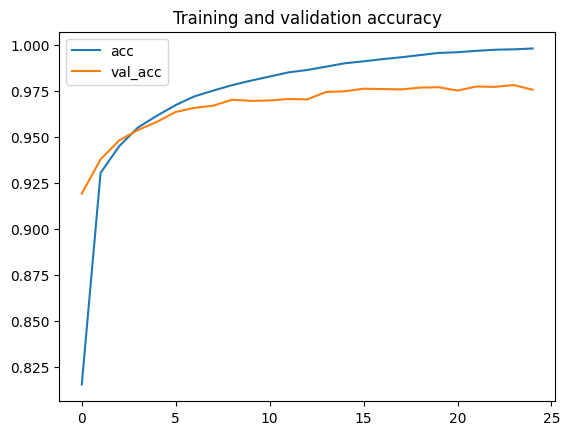

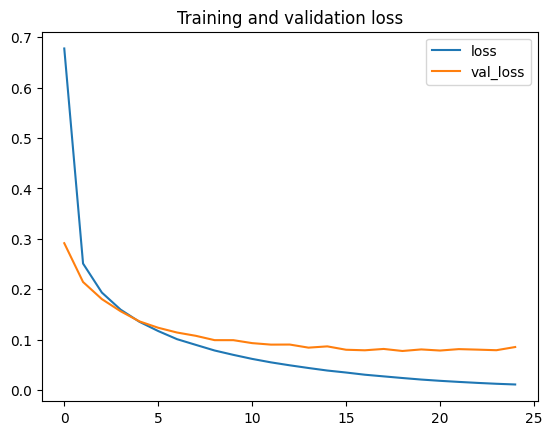

In [19]:
acc      = tranedmodel.history[     'accuracy' ]
val_acc  = tranedmodel.history[ 'val_accuracy' ]
loss     = tranedmodel.history[    'loss' ]
val_loss = tranedmodel.history['val_loss' ]
epochs   = range(len(acc))
plt.plot  ( epochs,     acc ,label='acc')
plt.plot  ( epochs, val_acc ,label='val_acc')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot  ( epochs,     loss ,label='loss')
plt.plot  ( epochs, val_loss ,label='val_loss')
plt.title ('Training and validation loss')
plt.legend()

In [22]:
import tensorflow as tf
loss_object = tf.keras.losses.CategoricalCrossentropy()
def create_noise(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = model(input_image)[0]
    loss = loss_object(input_label, prediction)

  gradient = tape.gradient(loss, input_image)
  signed_grad = tf.sign(gradient)
  return signed_grad

def attack(input_image,input_label):
    input_image = input_image.reshape(1,784)
    input_image = tf.Variable(input_image)
    noise = create_noise(input_image, input_label)
    image_noised = tf.reshape(input_image,shape=(28,28)) + 0.075* tf.reshape(noise,shape=(28,28))
    image = tf.reshape(image_noised,shape=(1,784))
    return np.argmax(model(image)),image_noised

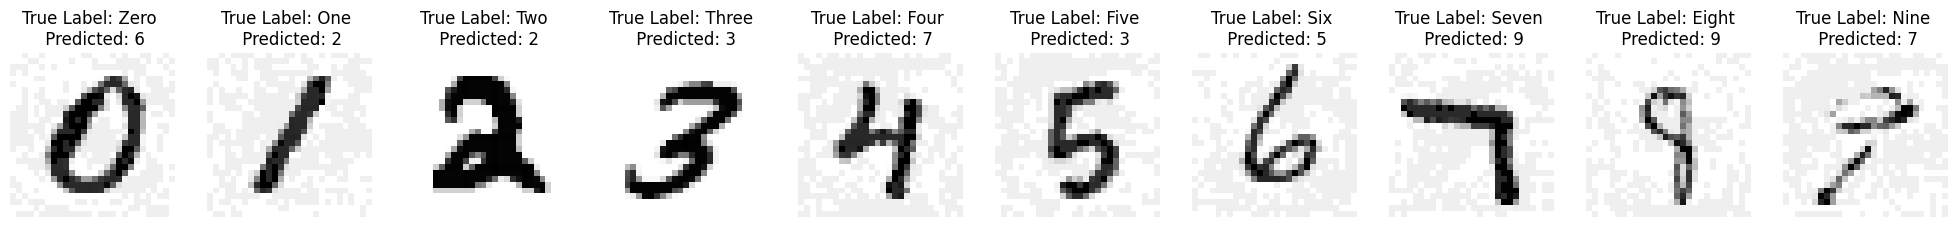

In [23]:
fig, axs = plt.subplots(1, len(class_names), figsize=(25, 7))
for class_label, ax in enumerate(axs):
    example_image = x_train[np.argmax(y_train, axis=1) == class_label][0]
    example_image = attack(example_image,keras.utils.to_categorical(class_label,10))[1]
    ax.imshow(example_image, cmap='Greys')
    predict_lable = np.argmax(model(tf.reshape(example_image,shape=(1,784))))
    ax.set_title(f"True Label: {class_names[class_label]} \n Predicted: {predict_lable}")
    ax.axis('off')
plt.show()

In [ ]:
noise_X = []
for r,w in zip(x_test,y_test):
    result = attack(r.reshape(1, -1),w)[1]
    noise_X.append(result)
noise_X_array = np.array(noise_X)


In [ ]:
y_hat_noise = model(noise_X_array.reshape(10000, 784))

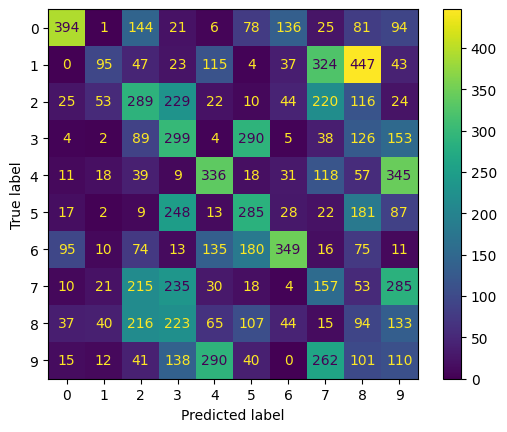

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cmm = confusion_matrix(y_true = np.argmax(y_test,axis=-1),y_pred = np.argmax(y_hat_noise,axis=-1))
dispp= ConfusionMatrixDisplay(confusion_matrix=cmm)
dispp.plot()

Text(0.5, 1.0, 'real label : 5 \n predict lable : 4')

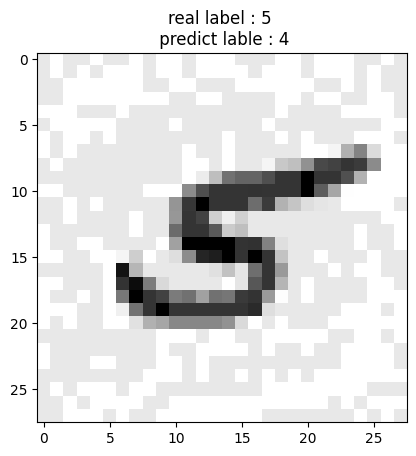

In [ ]:
loss_object = tf.keras.losses.CategoricalCrossentropy()
def create_pgd_noise(input_image, input_label, epsilon=0.1, iterations=10):
    
    for _ in range(iterations):
        with tf.GradientTape() as tape:
            tape.watch(input_image)
            prediction = model(input_image)[0]
            loss = loss_object(input_label, prediction)
        
        gradient = tape.gradient(loss, input_image)
        signed_gradient = tf.sign(gradient)
        input_image = signed_gradient*epsilon+input_image
    return np.argmax(model(input_image)),input_image


pgd_noise = create_pgd_noise(xx, yy)[1]
pgd_noise = tf.reshape(pgd_noise, shape=(28, 28))
plt.imshow(pgd_noise,cmap='Greys')
plt.title(f'real label : {np.argmax(y_train[nn])} \n predict lable : {np.argmax(model(tf.reshape(pgd_noise,shape=(1,784))))}')


In [ ]:
noise_XX = []
for r, w in zip(x_test[0:5000], y_test[0:5000]):
    r_tensor = tf.convert_to_tensor(r.reshape(1, -1), dtype=tf.float32)  # Convert input to TensorFlow tensor
    result = create_pgd_noise(r_tensor, w)[1]
    noise_XX.append(result)

noise_X_arrays = np.array(noise_XX)


In [ ]:
y_hat_noise2 = model(noise_X_arrays.reshape(5000, 784))

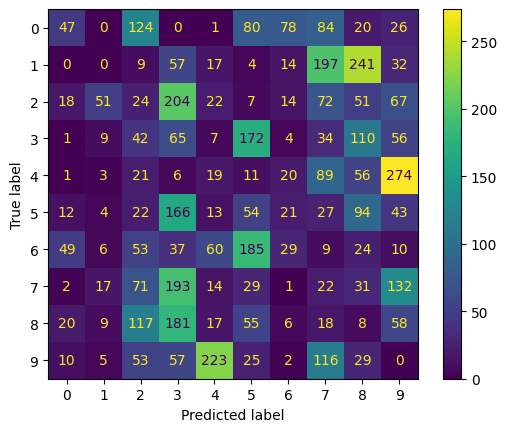

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cmms = confusion_matrix(y_true = np.argmax(y_test[0:5000],axis=-1),y_pred = np.argmax(y_hat_noise2,axis=-1))
dispps= ConfusionMatrixDisplay(confusion_matrix=cmms)
dispps.plot()

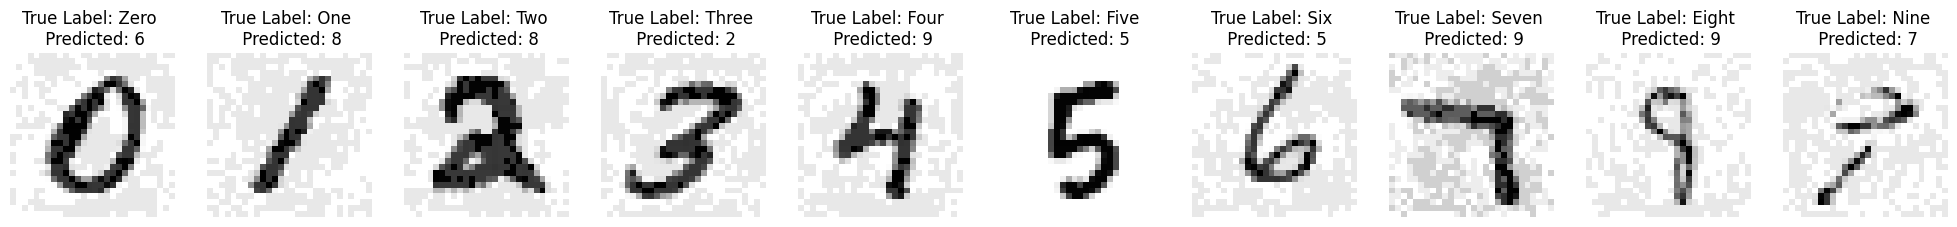

In [ ]:
fig, axs = plt.subplots(1, len(class_names), figsize=(25, 7))
for class_label, ax in enumerate(axs):
    example_image = x_train[np.argmax(y_train, axis=1) == class_label][0]
    example_image = tf.reshape(create_pgd_noise(tf.reshape(example_image, shape=(1, 784)),keras.utils.to_categorical(class_label,10))[1],shape=(28, 28))
    ax.imshow(example_image, cmap='Greys')
    predict_lable = np.argmax(model(tf.reshape(example_image,shape=(1,784))))
    ax.set_title(f"True Label: {class_names[class_label]} \n Predicted: {predict_lable}")
    ax.axis('off')
plt.show()